In [1]:
!pip install transformers datasets pillow torch soundfile librosa


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import torch
from transformers import (
    pipeline,
    AutoImageProcessor,
    AutoModelForObjectDetection,
    SpeechT5ForTextToSpeech,
    SpeechT5Processor
)
from PIL import Image
import requests
from io import BytesIO
import soundfile as sf
import numpy as np
from collections import Counter





In [15]:
!pip install timm


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

device = 0 if torch.cuda.is_available() else -1

detector = pipeline(
    task="object-detection",
    model="hustvl/yolos-tiny",
    device=device
)


Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

The image processor of type `YolosImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


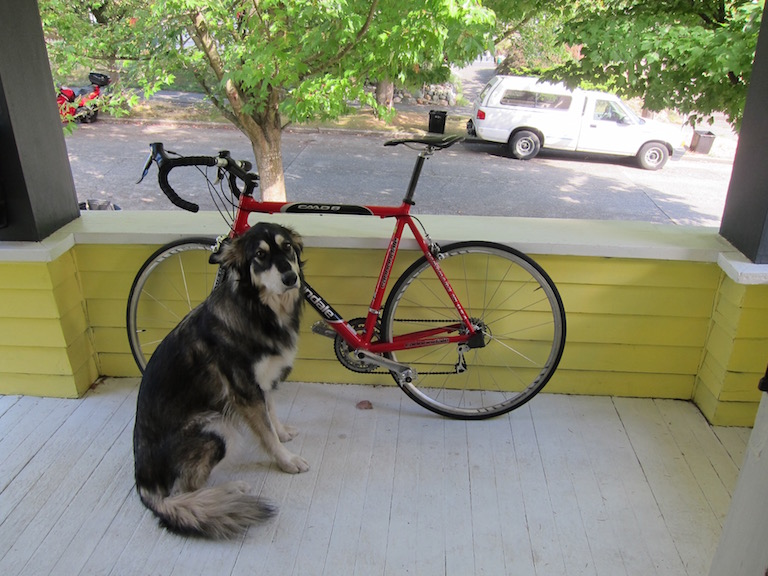

In [6]:

# Example: Local file
img = Image.open("images/dog.jpg").convert("RGB")
img


In [7]:

detections = detector(img)
detections[:5]   # Show sample results


[{'score': 0.9758323431015015,
  'label': 'bicycle',
  'box': {'xmin': 132, 'ymin': 136, 'xmax': 562, 'ymax': 420}},
 {'score': 0.5876837372779846,
  'label': 'motorcycle',
  'box': {'xmin': 57, 'ymin': 70, 'xmax': 112, 'ymax': 125}},
 {'score': 0.9992735981941223,
  'label': 'dog',
  'box': {'xmin': 128, 'ymin': 200, 'xmax': 318, 'ymax': 543}},
 {'score': 0.9748361110687256,
  'label': 'car',
  'box': {'xmin': 468, 'ymin': 84, 'xmax': 686, 'ymax': 170}},
 {'score': 0.8709448575973511,
  'label': 'truck',
  'box': {'xmin': 465, 'ymin': 84, 'xmax': 687, 'ymax': 168}}]

In [8]:

def summarize_labels(detections):
   
    # Count labels
    labels = [d["label"] for d in detections]
    counts = Counter(labels)

    # Generate natural language description
    parts = []
    for label, n in counts.items():
        if n == 1:
            parts.append(f"one {label}")
        else:
            parts.append(f"{n} {label}s")

    sentence = "The image contains " + ", ".join(parts) + "."
    return sentence

generated_text = summarize_labels(detections)
print("Generated Description:", generated_text)


Generated Description: The image contains one bicycle, one motorcycle, one dog, one car, 2 trucks, one potted plant.


In [3]:
!pip install datasets soundfile speechbrain

  Using cached ruamel_yaml-0.18.17-py3-none-any.whl.metadata (27 kB)
  Using cached ruamel_yaml_clib-0.2.15-cp312-cp312-win_amd64.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/864.1 kB ? eta -:--:--
   --------------------------------------- 864.1/864.1 kB 19.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 25.6 MB/s eta 0:00:00
Using cached ruamel_yaml-0.18.17-py3-none-any.whl (121 kB)
Using cached ruamel_yaml_clib-0.2.15-cp312-cp312-win_amd64.whl (119 kB)



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install https://github.com/huggingface/transformers.git

     - 0 bytes ? 0:00:00
     \ 431.5 kB 3.9 MB/s 0:00:00


  ERROR: Cannot unpack file C:\Users\psseri\AppData\Local\Temp\pip-unpack-oe1zdxdj\transformers.git (downloaded from C:\Users\psseri\AppData\Local\Temp\pip-req-build-dvmc747r, content-type: text/html; charset=utf-8); cannot detect archive format

[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Cannot determine archive format of C:\Users\psseri\AppData\Local\Temp\pip-req-build-dvmc747r


In [6]:
!pip install --upgrade accelerate


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install -U sentencepiece transformers datasets

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   --------------------- ------------------ 5.5/10.4 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 5.1.0
    Uninstalling transformers-5.1.0:
      Successfully uninstalled transformers-5.1.0



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from transformers import AutoProcessor, AutoModel
import numpy as np, soundfile as sf, torch, IPython.display as ipd

processor = AutoProcessor.from_pretrained("suno/bark-small")
model = AutoModel.from_pretrained("suno/bark-small")

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

In [61]:
inputs = processor(text=generated_text, return_tensors="pt")

with torch.no_grad():
    audio = model.generate(**inputs)

audio_np = audio.cpu().numpy().flatten().astype(np.float32)
audio_np = audio_np / (np.max(np.abs(audio_np)) + 1e-9)

sf.write("Approch1_output.wav", audio_np, 16000, subtype="PCM_16")
ipd.Audio("Approch1_output.wav")

Passing `generation_config` together with generation-related arguments=({'min_eos_p'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Passing `generation_config`